In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Tarea 2 Métodos iterativos para ecuaciones no lineales 

### Rafael Alejandro García Ramírez 

### email: rafael.ramirez@cimat.mx

###  Due 11:55 pm del domingo 02 de septiembre de 2023.

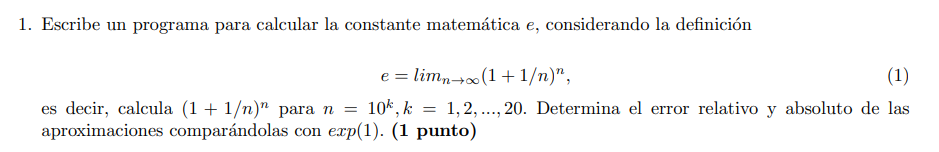

Recordemos que para $p$ el valor en el espacio dual y $p^{*}$ nuestro valor dual numérico:

### $\epsilon_{\text{relativo}} = \frac{\left | p -p^{*} \right |}{\left | p \right |}$

### $\epsilon_{\text{absoluto}} = \left | p -p^{*} \right |$


Dado que tenemos valores bastante gandes para $n$ recordemos el limite 

$\lim_{n \rightarrow\infty} \frac{1}{n}= 0$

Por lo tanto para un numero muy grande la función original se hace 

$e \sim \left ( 1 +\frac{1}{n} \right )^{n}\approx 1^{n} = 1$

Esto para algún n que haga (comience)

$\frac{1}{n} \leq  \epsilon_{\text{machine}}$    

Entonces en algún punto de las evaluaciones los valores se desplomarán a zero.

In [89]:
def euler_aproximacion(n):
    return (1 + n**-1)**n

datos = [euler_aproximacion(10**i) for i in range(1,21)]

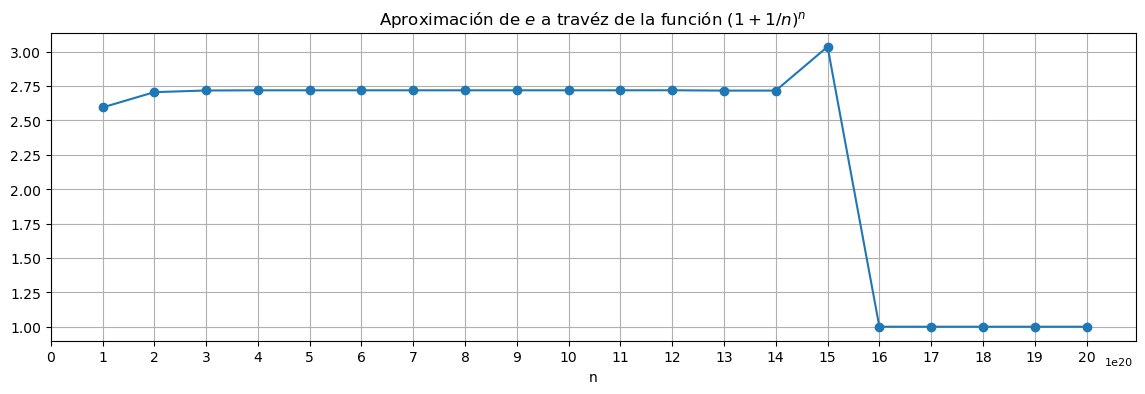

In [90]:
plt.figure(figsize=(14, 4))
plt.plot(range(1,21), datos, marker = "o")
plt.annotate('1e20', xy=(0.985, -0.08), xycoords='axes fraction', fontsize=8, ha='center')
plt.xticks(range(0,21))
plt.title("Aproximación de $e$ a travéz de la función $(1 + 1/n)^{n}$")
plt.xlabel("n")
plt.grid()
plt.savefig("graficos1.png")
plt.show()

In [91]:
error_relativo = [abs(np.exp(1) - dato) / abs(dato) for dato in datos]
error_absoluto = [abs(np.exp(1) - dato) for dato in datos]

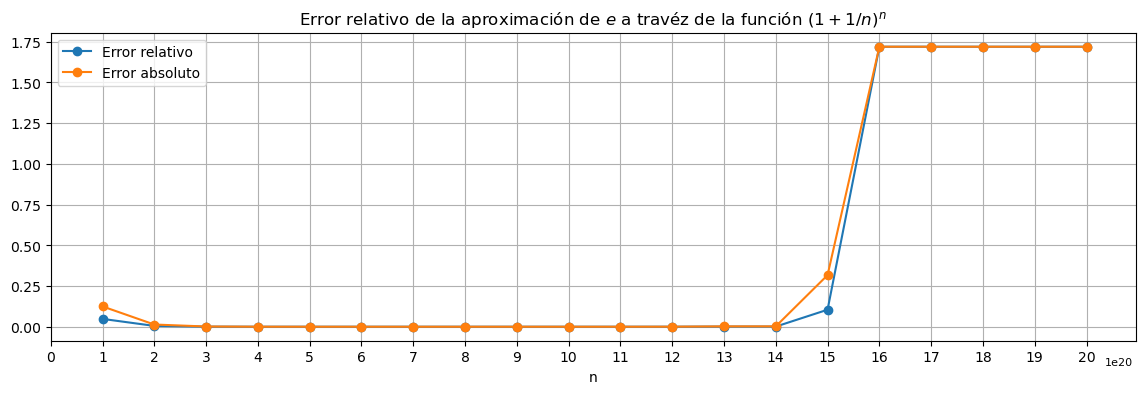

In [95]:
plt.figure(figsize=(14, 4))
plt.plot(range(1,21), error_relativo, marker = "o", label = "Error relativo")
plt.plot(range(1,21), error_absoluto, marker = "o", label = "Error absoluto")
plt.annotate('1e20', xy=(0.985, -0.08), xycoords='axes fraction', fontsize=8, ha='center')
plt.xticks(range(0,21))
plt.title("Error relativo de la aproximación de $e$ a travéz de la función $(1 + 1/n)^{n}$")
plt.xlabel("n")
plt.legend()
plt.grid()
plt.savefig("graficos2.png")
plt.show()

No sabemos mucho lo que ocurre en medio de estos valores (desde 2 hasta 14), desconocemos si son similares o muy distantes, por lo que tomamos la escala logaritmica 

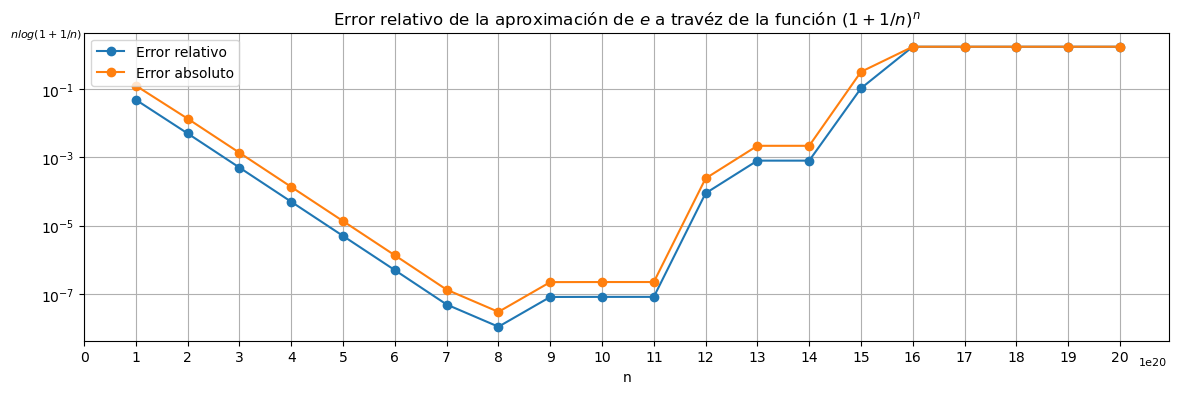

In [96]:
plt.figure(figsize=(14, 4))
plt.plot(range(1,21), error_relativo, marker = "o", label = "Error relativo")
plt.plot(range(1,21), error_absoluto, marker = "o", label = "Error absoluto")
plt.annotate('1e20', xy=(0.985, -0.08), xycoords='axes fraction', fontsize=8, ha='center')
plt.annotate('$n log(1 + 1/n)$', xy=(-0.035, 0.985), xycoords='axes fraction', fontsize=8, ha='center')
plt.xticks(range(0,21))
plt.title("Error relativo de la aproximación de $e$ a travéz de la función $(1 + 1/n)^{n}$")
plt.xlabel("n")
plt.yscale("log")
plt.legend(loc = "upper left")
plt.grid()
plt.savefig("graficos3.png")
plt.show()

In [17]:
import pandas as pd

valores = [f"1e{i + 1}" for i in range(0,20)]

tabla = pd.DataFrame(list(zip(valores, datos, error_relativo, error_absoluto)), columns = headers) 
#print(tabla.to_latex(index=False, multirow = True))
tabla

,Valor n,Aproximacion,Error relativo,Error Absoluto
0,1e1,2.593742,4.801532e-02,1.245394e-01
1,1e2,2.704814,4.979270e-03,1.346800e-02
2,1e3,2.716924,4.997918e-04,1.357896e-03
3,1e4,2.718146,4.999792e-05,1.359016e-04
4,1e5,2.718268,4.999973e-06,1.359127e-05
5,1e6,2.718280,5.000821e-07,1.359363e-06
6,1e7,2.718282,4.941613e-08,1.343270e-07
7,1e8,2.718282,1.107747e-08,3.011169e-08
8,1e9,2.718282,8.224037e-08,2.235525e-07
9,1e10,2.718282,8.269037e-08,2.247757e-07


Visualizando la gráfica y con los valores aquí presentados, vemos que el error relativo es menor que el valor absoluto, esto es algo de qué esperarse pues el numerador del valor relativo es el valor absoluto dividido entre el valor real, lo cual nos indica un buen comportamiento en los datos y que la relación del error con respecto al valor real es bastante baja. De la gráfica escalada logarítmicamente vemos que se tiene el mejor valor para un $n = 8$, al contrario de lo que se podría esperar que para valores más altos se tendría una mejor aproximación según la definición que estamos tomando en cuenta. En la siguiente tabla se puede visualizar mejor cada valor de las gráficas. 

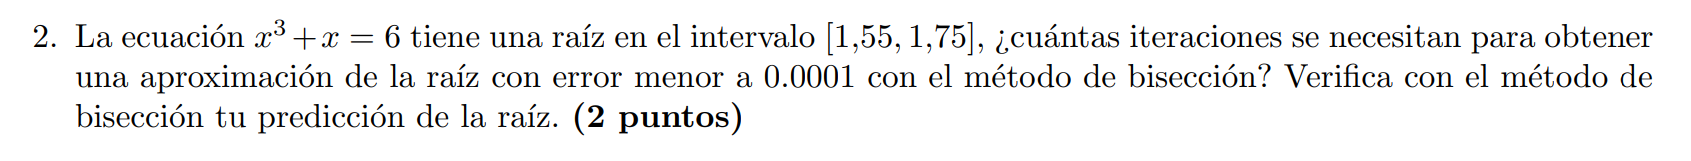

Tenemos que las diferencias entre el el punto $p$ y el calculado es 

$\left | p_{n} - p \right | \leq \frac{b-a}{2^{N}}< 10^{-4}$,  para $n\geq 1$

Entonces para $a = 1.55$ y $b = 1.75$, sustutiyendo tenemos 

$\rightarrow \frac{0.2}{2^{N}} < 10^{-4}$

$\rightarrow 2^{N} > (0.2)10^{4} = 2000$

$\rightarrow N > \frac{log(2000)}{log(2)} \approx 10.96$

Y dado que $N$ tiene que se mayor a esta cantidad tenemos que $N = 11$. Para poder demostrar esto vamo a programar el método de la bisección y contar la candidad de iteraciones que se requiere para llegar al resultado dentro del nivel de tolerancia 

In [3]:
def metodo_biseccion(inicio_intervalo, fin_intervalo, tolerancia, max_iteraciones, funcion_objetivo):
    """
    Calcula la raiz de una funcion mediante el método de bisección.

    Parametros:
    inicio_intervalo (float): Extremo izquierdo del intervalo inicial.
    fin_intervalo (float): Extremo derecho del intervalo inicial.
    tolerancia (float): Tolerancia para detener las iteraciones cuando el intervalo sea lo suficientemente pequenio.
    max_iteraciones (int): Número maximo de iteraciones permitidas.
    funcion_objetivo (function): La funcion para la cual se busca la raiz.

    Retorna:
    tuple: Una tupla (raiz, iteraciones) que contiene la raiz aproximada encontrada y el número de iteraciones realizadas.
           En caso de fracaso, retorna un mensaje indicando que el método no tuvo éxito.
    """
    valor_inicio = funcion_objetivo(inicio_intervalo)
    datos = []
    
    for iteracion in range(1, int(max_iteraciones + 1)):
        punto_medio = inicio_intervalo + (fin_intervalo - inicio_intervalo) / 2
        valor_punto_medio = funcion_objetivo(punto_medio)
        datos.append(punto_medio)
        if valor_punto_medio == 0 or abs(fin_intervalo - inicio_intervalo) / 2 < tolerancia:
            return punto_medio, iteracion, datos
        
        if valor_inicio * valor_punto_medio > 0:
            inicio_intervalo = punto_medio
            valor_inicio = valor_punto_medio
        else:
            fin_intervalo = punto_medio
            
    return "El metodo no tuvo exito en encontrar una raiz dentro del intervalo dado."

def funcion1(x):
    return x**3 + x - 6


raiz, cantidad_iteraciones, _ = metodo_biseccion(inicio_intervalo = 1.55, fin_intervalo = 1.75,
                                              tolerancia = 1e-4, max_iteraciones = 10**5,
                                              funcion_objetivo = funcion1)
print(f"La raiz es: {raiz}, que se encontro en la iteracion: {cantidad_iteraciones}.")


La raiz es: 1.63427734375, que se encontro en la iteracion: 11.


Confirmamos que efectivamente la cantidad de iteraciones necesarias son 11.

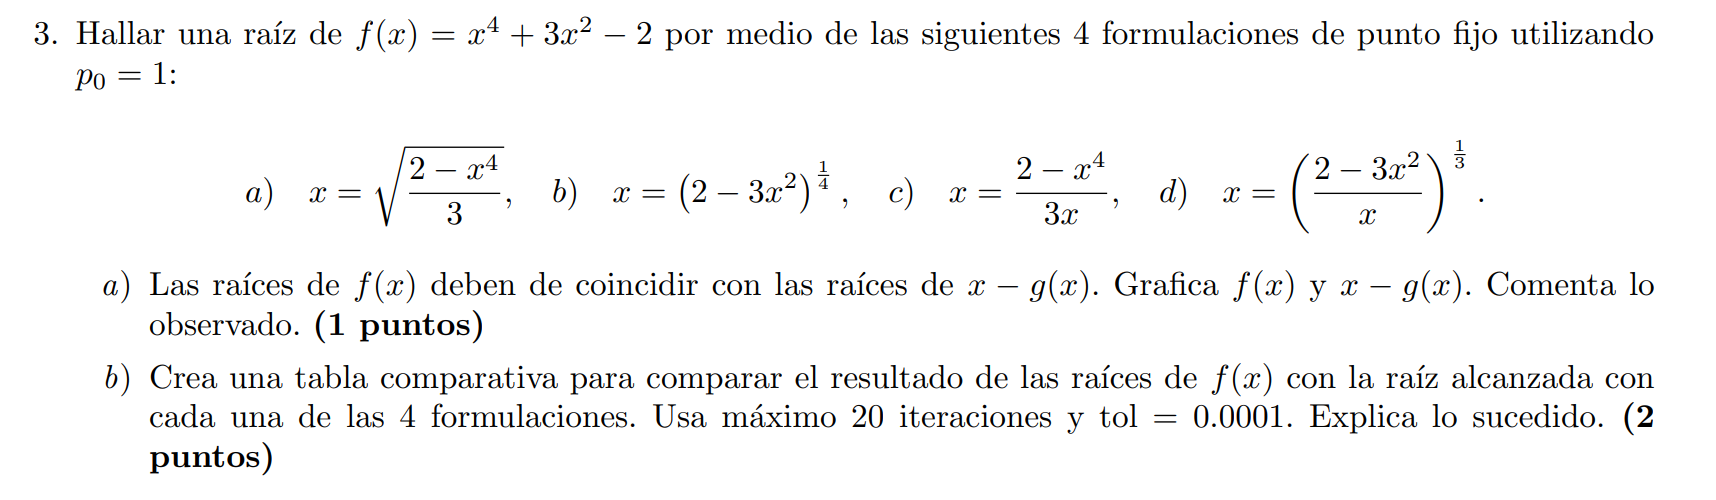

Creamos el código para el método 

In [2]:
def punto_fijo(punto_inicial, tolerancia, max_iteraciones, funcion_objetivo):
    """
    Encuentra una aproximación de la raíz de una función utilizando el método de punto fijo.

    Parámetros:
    punto_inicial (float): Valor inicial para comenzar las iteraciones.
    tolerancia (float): Valor mínimo de cambio en el resultado para considerar convergencia.
    max_iteraciones (int): Número máximo de iteraciones permitidas.
    funcion_objetivo (function): Función objetivo para la cual se busca la raíz.

    Retorna:
    tuple: Una tupla que contiene:
        - float: Aproximación de la raíz encontrada.
        - int: Número de iteraciones realizadas.
        - list: Lista de valores aproximados en cada iteración.
        - En caso de error de Overflow:
            - None: Indicador de error.
            - str: Mensaje de error.
            - list: Lista de valores aproximados hasta el momento del error.
    """

    datos = []  
    for iteracion in range(max_iteraciones):
        try:
            punto_nuevo = funcion_objetivo(punto_inicial)  
            datos.append(punto_nuevo)  
        except OverflowError:
            return None, "Error de overflow. El método no tuvo éxito debido a un cálculo que resultó en un valor demasiado grande.", datos
        
        if abs(punto_nuevo - punto_inicial) < tolerancia:
            return punto_nuevo, iteracion + 1, datos  
        else:
            punto_inicial = punto_nuevo 
    
    return f"El método falló después de {max_iteraciones} iteraciones.", f"Último valor: {punto_nuevo}.", datos


Ahora utilizamos el método para determinar las raíces de cada función 

In [3]:
funcion_original = lambda x: x**4 + 3*x**2 - 2
funcion_a = lambda x: ((2 - x**4) / 3)**0.5
funcion_b = lambda x: (2 - 3*(x**2))**0.25
funcion_c = lambda x: ((2 - x**4) / (3*x))
funcion_d = lambda x: ((2 - 3*x**2) / x)**(1/3)

raiz_a, iteraciones_a, datos_a = punto_fijo(punto_inicial = 1, tolerancia = 0.0001, max_iteraciones =  20, funcion_objetivo = funcion_a)
raiz_b, iteraciones_b, datos_b = punto_fijo(punto_inicial = 1, tolerancia = 0.0001, max_iteraciones =  20, funcion_objetivo = funcion_b)
raiz_c, iteraciones_c, datos_c = punto_fijo(punto_inicial = 1, tolerancia = 0.0001, max_iteraciones =  20, funcion_objetivo = funcion_c)
raiz_d, iteraciones_d, datos_d = punto_fijo(punto_inicial = 1, tolerancia = 0.0001, max_iteraciones =  20, funcion_objetivo = funcion_d)

print(f"La raíz de la funcion a es: {raiz_a} - Iteraciones = {iteraciones_a}")
print(f"La raíz de la funcion b es: {raiz_b} - Iteraciones = {iteraciones_b}")
print(f"La raíz de la funcion c es: {raiz_c} - Iteraciones = {iteraciones_c}")
print(f"La raíz de la funcion d es: {raiz_d} - Iteraciones = {iteraciones_d}")


La raíz de la funcion a es: 0.7493865308123768 - Iteraciones = 10
La raíz de la funcion b es: El método falló después de 20 iteraciones. - Iteraciones = Último valor: (1.439747192791818-0.7568662623535546j).
La raíz de la funcion c es: None - Iteraciones = Error de overflow. El método no tuvo éxito debido a un cálculo que resultó en un valor demasiado grande.
La raíz de la funcion d es: El método falló después de 20 iteraciones. - Iteraciones = Último valor: (1.2909944495195218-1.1547005365558833j).


Parece ser que solamente la reformulacion $a$ converge, mientras que las reformulaciones $b$ y $d$ se van a valores imaginarios y la reformulacion $c$ diverge completamente. Grafiquemos cada reformulacion con la formulacion original para apreciar el comportamiento de cada una de ellas

In [4]:
import warnings
warnings.filterwarnings('ignore')

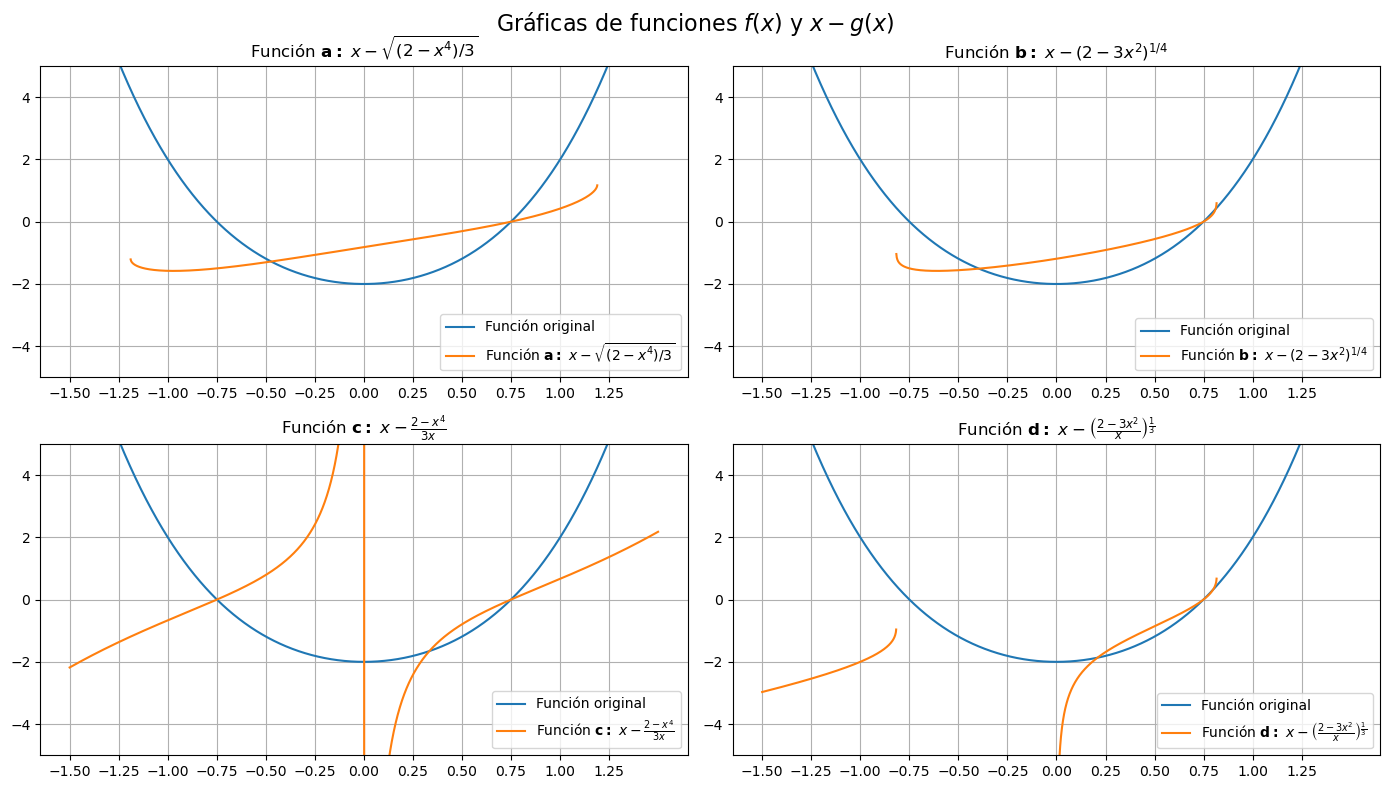

In [87]:
funcion_original = lambda x: x**4 + 3*x**2 - 2
funcion_a = lambda x: x - ((2 - x**4) / 3)**0.5
funcion_b = lambda x: x - (2 - 3*(x**2))**0.25
funcion_c = lambda x: x - ((2 - x**4) / (3*x))
funcion_d = lambda x: x - ((2 - 3*x**2) / x)**(1/3)

x = np.arange(-1.5,1.5,0.001)

a = [funcion_a(i) for i in x]
b = [funcion_b(i) for i in x]
c = [funcion_c(i) for i in x]
d = [funcion_d(i) for i in x]


yOriginal = [funcion_original(i) for i in x]

funciones = [a,b,c,d]
nombres = ["Función $\mathbf{a:}$ $x - \\sqrt{(2 - x^{4})/3}$", "Función $\mathbf{b:}$ $x - (2 - 3x^{2})^{1/4}$", "Función $\mathbf{c:}$ $x - \\frac{2 - x^{4}}{3x}$", "Función $\mathbf{d:}$ $x - \\left ( \\frac{2 - 3x^{2}}{x} \\right )^{\\frac{1}{3}}$"]
plt.figure(figsize=(14, 8))
for i, (y_func, label) in enumerate(zip(funciones, nombres), start=1):
    plt.subplot(2, 2, i)
    plt.plot(x, yOriginal, label="Función original")
    plt.plot(x, y_func, label=label)
    plt.xticks(np.arange(-1.5,1.5,0.25))
    plt.ylim(-5, 5)
    plt.title(label)
    plt.legend(loc = "lower right")
    plt.grid()
    
plt.tight_layout()
plt.suptitle("Gráficas de funciones $f(x)$ y $x - g(x)$", fontsize = 16)
plt.subplots_adjust(top=0.91)
plt.savefig("graficos31.png")
plt.show()

Se puede observar que definitivamente existe una raíz alrededor de $x \approx 0.75$, y en las cuatro formulaciones la función comparte la misma raíz que la función original. Sin embargo, es el método el que conduce a la divergencia en el caso de la función $c$, así como a la búsqueda de raíces imaginarias en las funciones $b$ y $d$. Además, la función $c$ introduce una singularidad en $x = 0$. Aunque este no sea el caso, podría eliminar alguna raíz dependiendo de la función original, además de que complica sustancialmente el cálculo.

Ahora mostraremos una tabla para la misma tolerancia usada y con 20 iteraciones ]

In [25]:
import pandas as pd 

max_length = max(len(datos_a), len(datos_b), len(datos_c), len(datos_d))

datos_a += [None] * (max_length - len(datos_a))
datos_b += [None] * (max_length - len(datos_b))
datos_c += [None] * (max_length - len(datos_c))
datos_d += [None] * (max_length - len(datos_d))


def truncate_complex(val, decimals):
    if val is None:
        return None
    elif isinstance(val, complex):
        real_part = round(val.real, decimals)
        imag_part = round(val.imag, decimals)
        return complex(real_part, imag_part)
    else:
        return round(val, decimals)

datos_a = [truncate_complex(val, 5) for val in datos_a]
datos_b = [truncate_complex(val, 5) for val in datos_b]
datos_c = [truncate_complex(val, 5) for val in datos_c]
datos_d = [truncate_complex(val, 5) for val in datos_d]

n = [i for i in range(1, max_length + 1)]
dato = {"Iteracion": n, "Funcion a": datos_a, "Funcion b": datos_b, "Funcion c": datos_c, "Funcion d": datos_d}
tabla = pd.DataFrame(dato)
tabla.to_csv("tabla_iteracion_fija.csv", index=False)

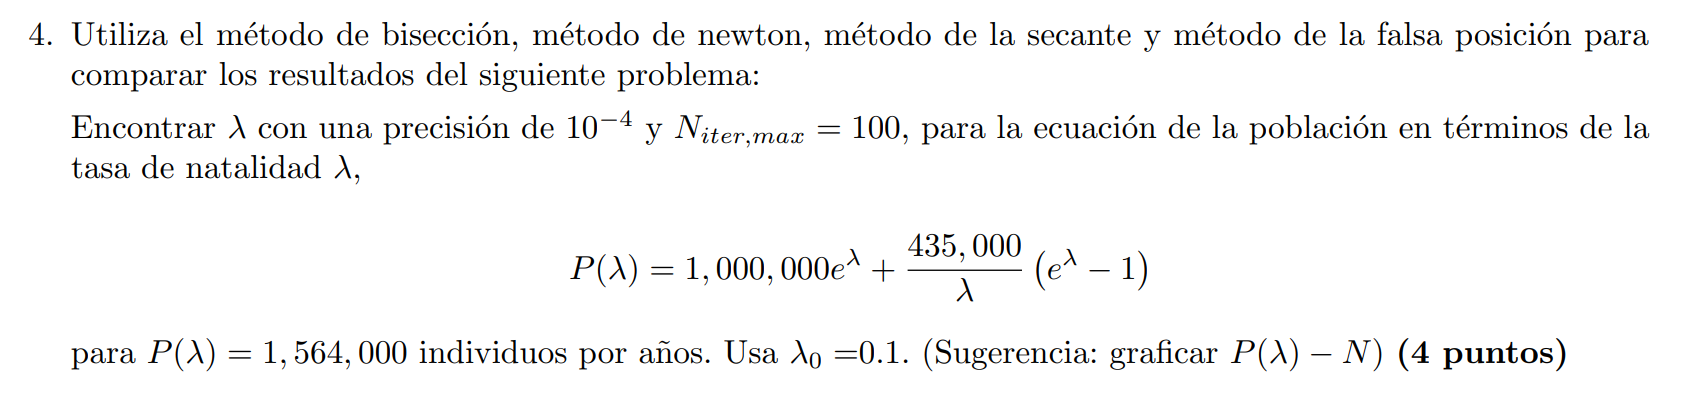

In [10]:
def metodo_newton(p0, tolerancia, max_iteraciones, funcion_objetivo, funcion_derivada):
    datos = []
    for i in range(max_iteraciones):
        p = p0 - (funcion_objetivo(p0) / funcion_derivada(p0))
        datos.append(p)
        if abs(p - p0) < tolerancia:
            return p, i + 1, datos
        else:
            p0 = p
            
    return p, f"El método falló después de {max_iteraciones} iteraciones.", datos
def funcion2(x):
    return np.cos(x) - x
def funcion_der(x):
    return -np.sin(x) - 1

metodo_newton(p0 = np.pi/4, tolerancia = 1e-4, max_iteraciones =10**5, funcion_objetivo = funcion2, funcion_derivada = funcion_der)

(0.7390851332151611,
 3,
 [0.7395361335152383, 0.7390851781060102, 0.7390851332151611])

In [4]:
def metodo_secante(p0, p1, tolerancia, max_iteraciones, funcion_objetivo):
    q0 = funcion_objetivo(p0)
    q1 = funcion_objetivo(p1)
    datos = []
    
    for i in range(max_iteraciones):
        #print(f"q0 = {q0}, q1 = {q1}")
        p = p1 - q1*((p1 - p0) / (q1 - q0))
        datos.append(p)
        if abs(p - p1) < tolerancia:
            return p, i + 1, datos
        else:
            p0 = p1
            q0 = q1
            p1 = p
            q1 = funcion_objetivo(p)
    return f"El método falló después de {max_iteraciones} iteraciones."        

metodo_secante(p0 = 0.5, p1 = np.pi/4, tolerancia = 1e-4, max_iteraciones = 10**5, funcion_objetivo = funcion2)

(0.7390851493372764,
 3,
 [0.7363841388365822, 0.7390581392138897, 0.7390851493372764])

In [5]:
def metodo_falsa_posicion(p0, p1, tolerancia, max_iteraciones, funcion_objetivo):
    q0 = funcion_objetivo(p0)
    q1 = funcion_objetivo(p1)
    datos = []
    for i in range(max_iteraciones - 1):
        p = p1 - q1*((p1 - p0) / (q1 - q0))
        datos.append(p)
        if abs(p - p1) < tolerancia: 
            return p, i + 1, datos
        
        q = funcion_objetivo(p)
        
        if q*q1 < 0:
            p0 = p1
            q0 = q1
        
        p1 = p
        q1 = q
    return f"El método falló después de {max_iteraciones} iteraciones."        

metodo_falsa_posicion(p0 = 0.5, p1 = np.pi/4, tolerancia = 1e-4, max_iteraciones = 10**5, funcion_objetivo = funcion2)

(0.7390848638147098,
 3,
 [0.7363841388365822, 0.7390581392138897, 0.7390848638147098])

Dado que el método de la bisección ocupa un intervalo donde se encuentre la raíz y  el método de la secante y posición falsa requieren de dos puntos, graficaremos previamente las intersecciones de de ambos valores para encotrar un estimado. Después de jugar un poco con los intervalos de la función, podemos encontrar una zona donde se intesectan ambas rectas

<Figure size 1400x400 with 0 Axes>

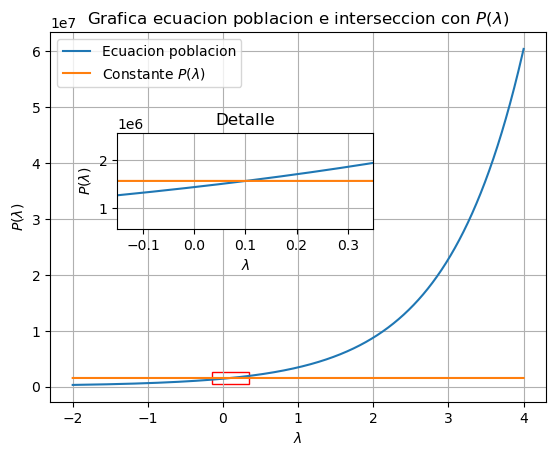

In [6]:
def ecuacion_poblacion(lambd):
    return (1e6 * np.exp(lambd)) + ((np.exp(lambd) - 1)*(1e3*435 / lambd))

valores_grafica = np.arange(-2, 4, 1e-5)
data_grafica = [ecuacion_poblacion(i) for i in valores_grafica]

plt.figure(figsize=(14, 4))
fig, ax_main = plt.subplots()
ax_main.plot(valores_grafica, data_grafica, label="Ecuacion poblacion")
ax_main.plot(valores_grafica, [1564000]*len(valores_grafica), label=f"Constante $P(\\lambda)$")
ax_main.set_title(f"Grafica ecuacion poblacion e interseccion con $P(\\lambda)$")
ax_main.set_xlabel(f"$\\lambda$")
ax_main.set_ylabel(f"$P(\\lambda)$")
ax_main.legend()
ax_main.grid()

# Definimos la region de la lupa
x_zoom, y_zoom = 0.1, 1564000  # Coordenadas del punto de zoom
width, height = 0.5, 2000000    # Tamanio de la lupa
rect = plt.Rectangle((x_zoom - width / 2, y_zoom - height / 2), width, height, edgecolor='red', facecolor='none')
ax_main.add_patch(rect)

# Creamos la region de la lupa
ax_zoom = plt.axes([0.23, 0.47, 0.4, 0.2]) # Coordenadas de impresion
ax_zoom.plot(valores_grafica, data_grafica, label="Ecuacion poblacion")
ax_zoom.plot(valores_grafica, [1564000]*len(valores_grafica), label=f"Constante $P(\\lambda)$")
ax_zoom.set_xlim(x_zoom - width / 2, x_zoom + width / 2)
ax_zoom.set_ylim(y_zoom - height / 2, y_zoom + height / 2)
ax_zoom.grid()
ax_zoom.set_title("Detalle")
ax_zoom.set_xlabel(f"$\\lambda$")
ax_zoom.set_ylabel("$P(\\lambda)$")
plt.savefig("graficos41.png")

plt.show()


Ocurre en alguna parte entre 0.08 y 0.12.

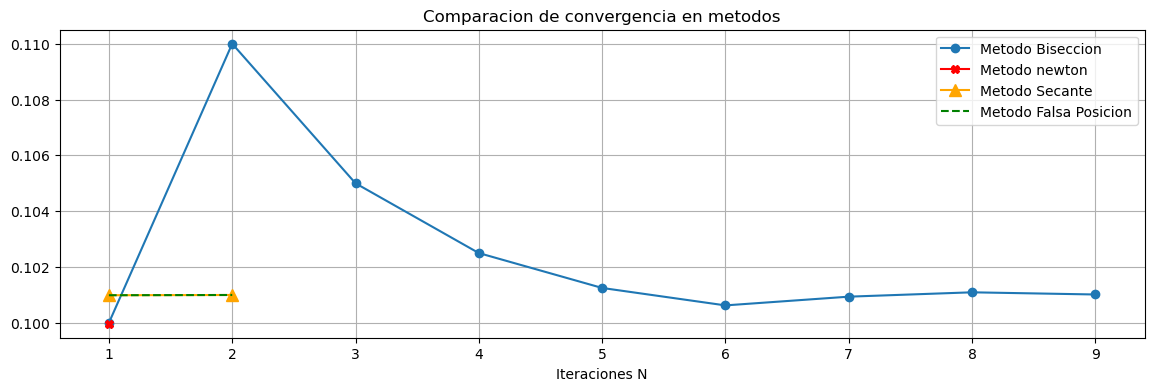

In [74]:
def ecuacion_poblacion(lambd): # modificamos la función
    return (1e6 * np.exp(lambd)) + ((np.exp(lambd) - 1)*(1e3*435 / lambd)) - 1.564e6

def ecuacion_poblacion_derivada(lambd):
    return (5000*(np.exp(lambd)*(200*lambd**2 + 87*lambd - 87)) + 87 ) / lambd**2

raiz_biseccion, iteraciones_biseccion, datos_biseccion = metodo_biseccion(inicio_intervalo = 0.08, fin_intervalo = 0.12, tolerancia = 1e-4, max_iteraciones = 100, funcion_objetivo = ecuacion_poblacion)
raiz_newton, iteraciones_newton , datos_newton = metodo_newton(p0 = 0.1, tolerancia = 1e-4, max_iteraciones = 100, funcion_objetivo = ecuacion_poblacion, funcion_derivada = ecuacion_poblacion_derivada)
raiz_secante, iteraciones_secante, datos_secante = metodo_secante(p0 = 0.1, p1 = 0.12, tolerancia = 1e-4, max_iteraciones = 100, funcion_objetivo = ecuacion_poblacion)
raiz_falsa_posicion, iteraciones_falsa_posicion, datos_falsa_posicion = metodo_falsa_posicion(p0 = 0.1, p1 = 0.12, tolerancia = 1e-4, max_iteraciones = 100, funcion_objetivo = ecuacion_poblacion)

plt.figure(figsize=(14, 4))
plt.plot(range(1, len(datos_biseccion) + 1), datos_biseccion, marker = "o", label = "Metodo Biseccion")
plt.plot(range(1, len(datos_newton) + 1), datos_newton, marker = "X", label = "Metodo newton", color = "red")
plt.plot(range(1, len(datos_secante) + 1), datos_secante,marker = "^", label = "Metodo Secante", markersize=8, color = "orange")
plt.plot(range(1, len(datos_falsa_posicion) + 1), datos_falsa_posicion, "--" ,label = "Metodo Falsa Posicion", color = "green")
plt.title("Comparacion de convergencia en metodos")
plt.xlabel("Iteraciones N")
plt.legend()
plt.grid()
plt.savefig("graficos42.png")
plt.show()

In [75]:
print(f"Raiz biseccion = {raiz_biseccion} -- Iteraciones = {iteraciones_biseccion}")
print(f"Raiz newton = {raiz_newton} -- Iteraciones = {iteraciones_newton}")
print(f"Raiz secante = {raiz_secante} -- Iteraciones = {iteraciones_secante}")
print(f"Raiz falsa posicion = {raiz_falsa_posicion} -- Iteraciones = {iteraciones_falsa_posicion}")

Raiz biseccion = 0.10101562500000001 -- Iteraciones = 9
Raiz newton = 0.09996831612889101 -- Iteraciones = 1
Raiz secante = 0.10099785001305919 -- Iteraciones = 2
Raiz falsa posicion = 0.10099785001305919 -- Iteraciones = 2


Nota: realmente no sé bien bien cuál es el propósito de este problema dado que ya se nos da un $\lambda_{0} = 0.1$ el cuál tiene une erro del  ~0.98% de del resultado. No es un ejemplo muy difícil de resolver pero bueno I guess (?)

Vamos a intenar cambiar el valor $\lambda_{0} = 1.2$  para ver como se comportan ahora los métodos

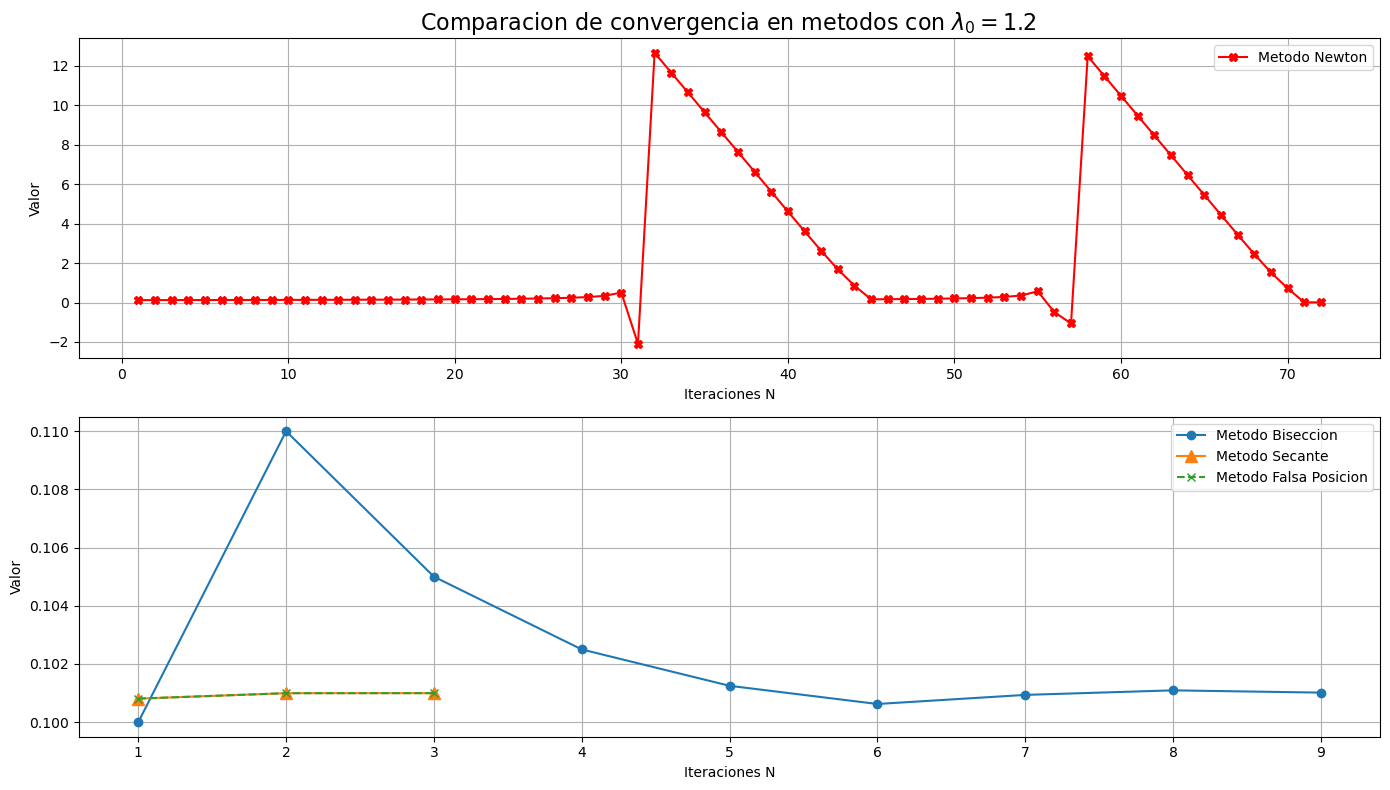

In [76]:
def ecuacion_poblacion(lambd): 
    return (1e6 * np.exp(lambd)) + ((np.exp(lambd) - 1)*(1e3*435 / lambd)) - 1.564e6

def ecuacion_poblacion_derivada(lambd):
    return (5000*(np.exp(lambd)*(200*lambd**2 + 87*lambd - 87)) + 87 ) / lambd**2

fig, axs = plt.subplots(2, 1, figsize=(14, 8))

raiz_biseccion, iteraciones_biseccion, datos_biseccion = metodo_biseccion(inicio_intervalo = 0.08, fin_intervalo = 0.12, tolerancia = 1e-4, max_iteraciones = 100, funcion_objetivo = ecuacion_poblacion)
raiz_newton, iteraciones_newton , datos_newton = metodo_newton(p0 = 0.12, tolerancia = 1e-4, max_iteraciones = 100, funcion_objetivo = ecuacion_poblacion, funcion_derivada = ecuacion_poblacion_derivada)
raiz_secante, iteraciones_secante, datos_secante = metodo_secante(p0 = 0.08, p1 = 0.12, tolerancia = 1e-4, max_iteraciones = 100, funcion_objetivo = ecuacion_poblacion)
raiz_falsa_posicion, iteraciones_falsa_posicion, datos_falsa_posicion = metodo_falsa_posicion(p0 = 0.08, p1 = 0.12, tolerancia = 1e-4, max_iteraciones = 100, funcion_objetivo = ecuacion_poblacion)


axs[0].plot(range(1, len(datos_newton) + 1), datos_newton, marker = "X", label = "Metodo Newton", color = "red")
axs[0].set_title("Comparacion de convergencia en metodos con $\\lambda_{0} = 1.2$ ", fontsize = 16)
axs[0].set_xlabel("Iteraciones N")
axs[0].set_ylabel("Valor")
axs[0].grid()
axs[0].legend()

axs[1].plot(range(1, len(datos_biseccion) + 1), datos_biseccion, marker = "o", label = "Metodo Biseccion")
axs[1].plot(range(1, len(datos_secante) + 1), datos_secante, marker = "^", label = "Metodo Secante", markersize=8)
axs[1].plot(range(1, len(datos_falsa_posicion) + 1), datos_falsa_posicion, "--" ,marker = "x", label = "Metodo Falsa Posicion")
axs[1].set_xlabel("Iteraciones N")
axs[1].set_ylabel("Valor")
axs[1].grid()
axs[1].legend()

plt.tight_layout()
plt.savefig("graficos44.png")
plt.show()


In [77]:
print(f"Raiz biseccion = {raiz_biseccion} -- Iteraciones = {iteraciones_biseccion}")
print(f"Raiz newton = {raiz_newton} -- Iteraciones = {iteraciones_newton}")
print(f"Raiz secante = {raiz_secante} -- Iteraciones = {iteraciones_secante}")
print(f"Raiz falsa posicion = {raiz_falsa_posicion} -- Iteraciones = {iteraciones_falsa_posicion}")

Raiz biseccion = 0.10101562500000001 -- Iteraciones = 9
Raiz newton = 0.009549259401648545 -- Iteraciones = 72
Raiz secante = 0.1009979298349529 -- Iteraciones = 3
Raiz falsa posicion = 0.10099791466302818 -- Iteraciones = 3
